In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75],[82],[92]), dtype=float)

In [5]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [6]:
y

array([[75.],
       [82.],
       [92.]])

In [7]:
#scale data from 0 to 1
X = X/np.amax(X, axis=0)
y = y/100 #Max score of a test is 100

In [8]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [10]:
sigmoid(np.random.randn(3,3))

array([[0.55939214, 0.20765171, 0.67631144],
       [0.60613395, 0.46645559, 0.68630903],
       [0.69184147, 0.14774962, 0.59143989]])

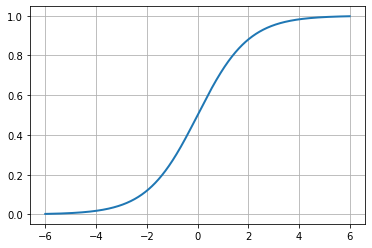

In [11]:
#graphing the sigmoid function
testinput = np.arange(-6, 6, 0.01)
plt.plot(testinput, sigmoid(testinput), linewidth=2)
plt.grid(1)
plt.show()

In [12]:
#set node sizes for all 3 layers
inputLayerSize = 2
hiddenLayerSize = 3
outputLayerSize = 1

#define random weights for first and second layers
W1 = np.random.randn(inputLayerSize, hiddenLayerSize)
W2 = np.random.randn(hiddenLayerSize, outputLayerSize)

def forwardprop(X):
    z2 = np.matmul(X, W1)
    a2 = sigmoid(z2)
    z3 = np.matmul(a2, W2)
    yHat = sigmoid(z3)
    return yHat

In [13]:
#run forward propagation for the first prediction
forwardprop(X)

array([[0.74150206],
       [0.7629209 ],
       [0.7770767 ]])

In [14]:
y

array([[0.75],
       [0.82],
       [0.92]])

In [79]:
#Gradient Descent and Cost Function
#create Sigmoid prime function

def sigmoidPrime(z):
    #find gradient of Sigmoid
    return np.exp(-z)/((1 + np.exp(-z))**2)

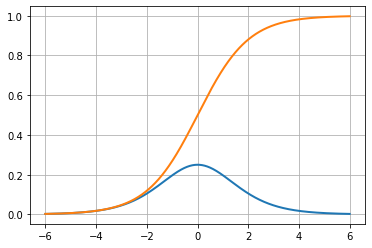

In [83]:
plt.plot(testinput,sigmoidPrime(testinput), linewidth=2)
plt.plot(testinput, sigmoid(testinput), linewidth=2)
plt.grid(1)
plt.show()

In [12]:
print(X)

[[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]


In [15]:
#Create Base Layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        pass

    def backward(self, gradient, learning_rate):
        pass


#Create Dense Layer
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.biases = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.biases
    
    def backward(self, gradient, learning_rate):
        weights_gradient = np.dot(gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.biases -= learning_rate * gradient
        return np.dot(self.weights.T, gradient)

#activation super class
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, gradient, learning_rate):
        return np.multiply(gradient, self.activation_prime(self.input))

#Hyperbolic Tangent subclass
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

#Error class - MSE
def MSE(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def MSE_Prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)



110000, error=0.750016
210000, error=0.698598
310000, error=0.668285
410000, error=0.659924
510000, error=0.655546
610000, error=0.649731
710000, error=0.643244
810000, error=0.636635
910000, error=0.630031
1010000, error=0.623418
1110000, error=0.616756
1210000, error=0.610004
1310000, error=0.603131
1410000, error=0.596117
1510000, error=0.588955
1610000, error=0.581648
1710000, error=0.574212
1810000, error=0.566670
1910000, error=0.559054
2010000, error=0.551404
2110000, error=0.543762
2210000, error=0.536175
2310000, error=0.528689
2410000, error=0.521353
2510000, error=0.514209
2610000, error=0.507298
2710000, error=0.500653
2810000, error=0.494302
2910000, error=0.488265
3010000, error=0.482556
3110000, error=0.477180
3210000, error=0.472138
3310000, error=0.467424
3410000, error=0.463027
3510000, error=0.458935
3610000, error=0.455131
3710000, error=0.451599
3810000, error=0.448320
3910000, error=0.445275
4010000, error=0.442447
4110000, error=0.439818
4210000, error=0.437373
4

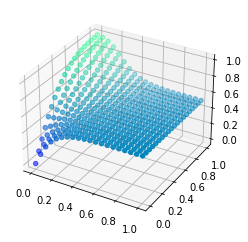

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Create Neural Network for XOR Problem
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 3),
    Tanh(),
    Dense(3,1),
    Tanh()
]


epochs = 10000
learning_rate = 0.1

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

for e in range (epochs):
    error = 0
    for x, y in zip(X, Y):
        output = predict(network, x)
        
        error += MSE(y,output)

        grad = MSE_Prime(y, output)
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    
    error /= len(x)
    print('%d%d, error=%f' % (e + 1, epochs, error))


points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()
                